# Diagnostic Plots
In the previous part of this lesson, we examined a number of diagnostic measures that we can use to assess both the model assumptions and identify any data features that may indicate modelling issues. Although we discussed interpretation of their numeric values, it is more typical to *visualise* these measures in various useful ways. We already saw some indication of these visualisations earlier when calling `plot(mod)` on a model fit using `lm()`. In this part of the lesson, we will discuss all the standard plots that `R` produces, as well as some additional visualisations that can be useful for assessing the suitability of the model for any given dataset.

## Diagnostic Plots for `lm()`

| Plot                  | Main purpose       | What we want to see                                                |
| --------------------- | -------------------| -------------------------------------------------------------------|
| Residuals vs Fitted   | Linearity          | The pattern across the fitted values is a flat line.               |
| QQ Normal             | Residual normality | All points lying along the main diagonal.                          |
| Scale-Location        | Homoscedasticity   | An equal vertical scattering of points.                            |
| Residuals vs Leverage | Outliers           | No points within the bands in the top-right or bottom-left corners.|


### Residual vs Fitted Plot

### Q-Q Normal Plot
The logic of examining the whole distribution of errors is that they were assumed i.i.d. Unfortunately, we know this is not true of the errors. So, the shape of the residual distribution is still normal, but the variance differs due to leverage. Because of this, the logic of collapsing the residuals together to assess the full distribution somewhat falls apart. As such, we typically compare the *standardised* residuals to a normal distribution, given that the effect of leverage has been removed.

In [41]:
options(repr.plot.width=10, repr.plot.height=12)

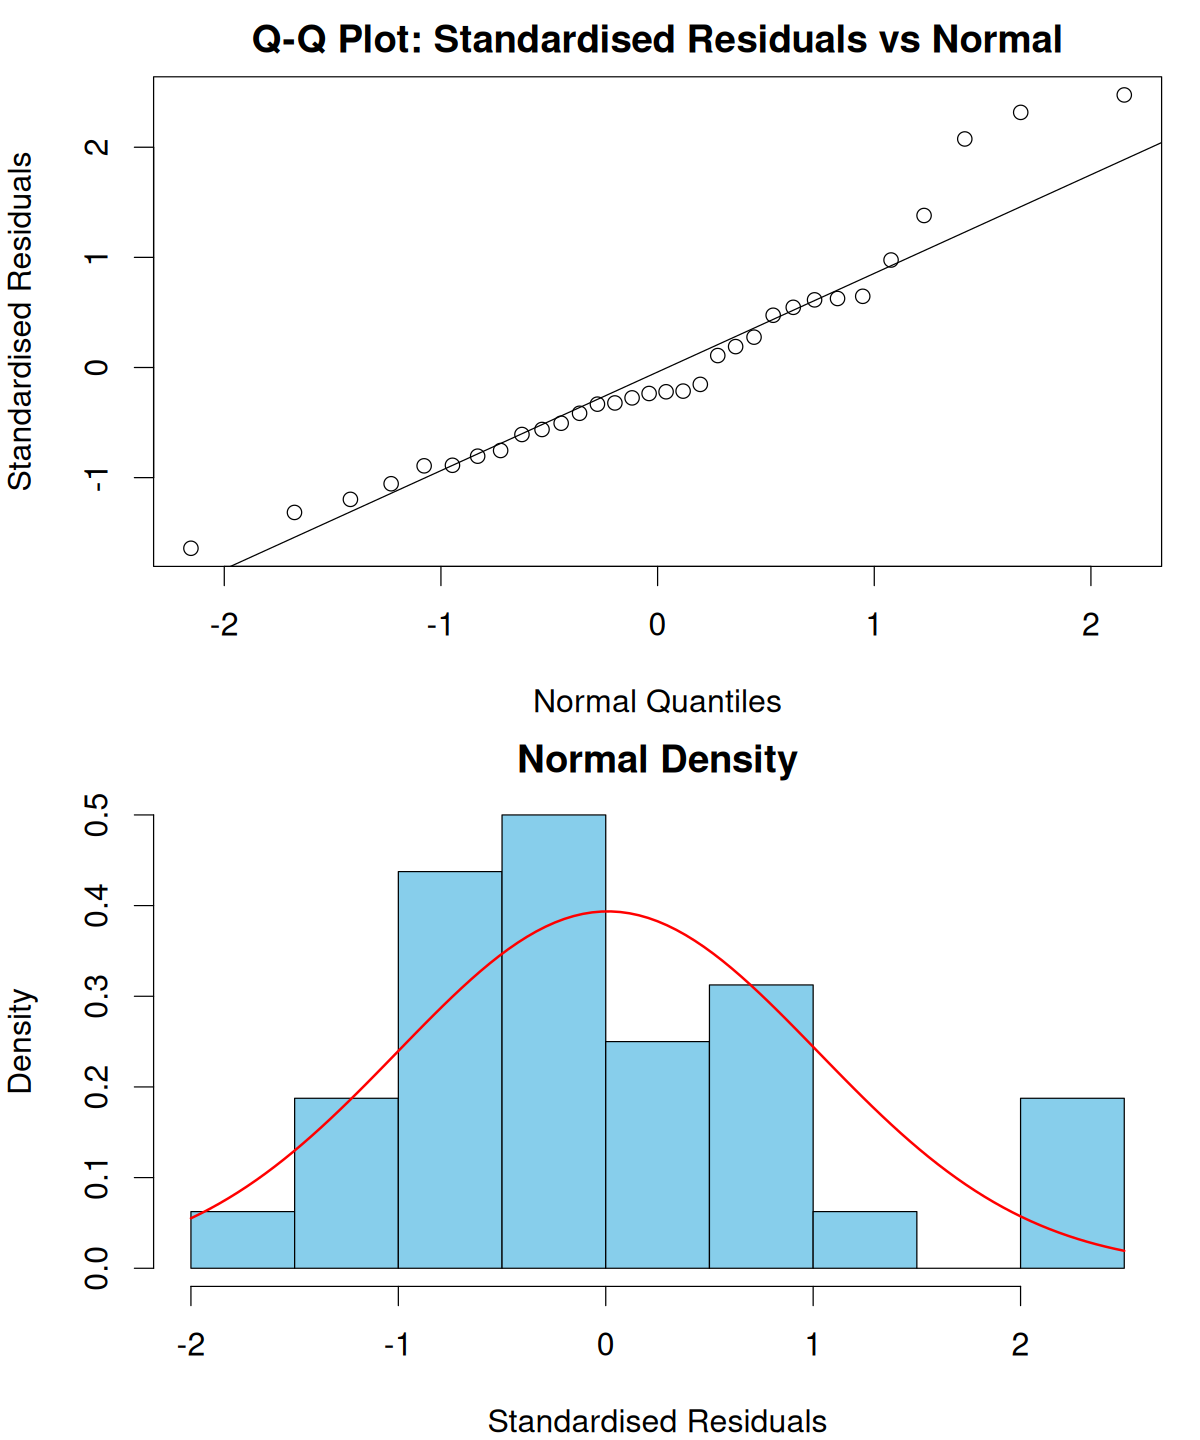

In [42]:
# Fit the model
mod       <- lm(mpg ~ wt + hp + cyl, data=mtcars)
resid.std <- rstandard(mod)

# Set up plot grid
par(mfrow=c(2,1), mar=c(4,4,2,1))
par(cex=1.6) # scaling

# Q-Q plot: Normal quantiles vs standardised residuals
qqnorm(resid.std, main="Q-Q Plot: Standardised Residuals vs Normal",
       xlab="Normal Quantiles", ylab="Standardised Residuals")
qqline(resid.std)

# Histogram + Normal density: Standardised residuals
hist(resid.std, breaks=10, probability=TRUE, main="Normal Density",
     xlab="Standardised Residuals", col="skyblue")
curve(dnorm(x, mean=mean(resid.std), sd=sd(resid.std)),
      col="red", lwd=2, add=TRUE)


In [43]:
options(repr.plot.width=12, repr.plot.height=7)

### Scale vs Location Plot

### Residuals vs Leverage Plot
Cook's distance...

## Additional Plot
As well as the standard plots produced by calling `plot(mod)`, there are some additional plots that can be useful to see various assumptions or data features more clearly. Here, we will have a brief rundown of some of the more useful.

### Correlation Plots
Although previously we indicated that assessing correlation between predictors is best served by the VIF, it can be useful at times to investigate correlation as part of the initial descriptive exploration of the data, prior to fitting any model. For that purpose, a correlation plot can be useful. In the example below, we use the `corrplot` package to visualise the entire `mtcars` dataset.

In [64]:
options(repr.plot.width=12, repr.plot.height=12)

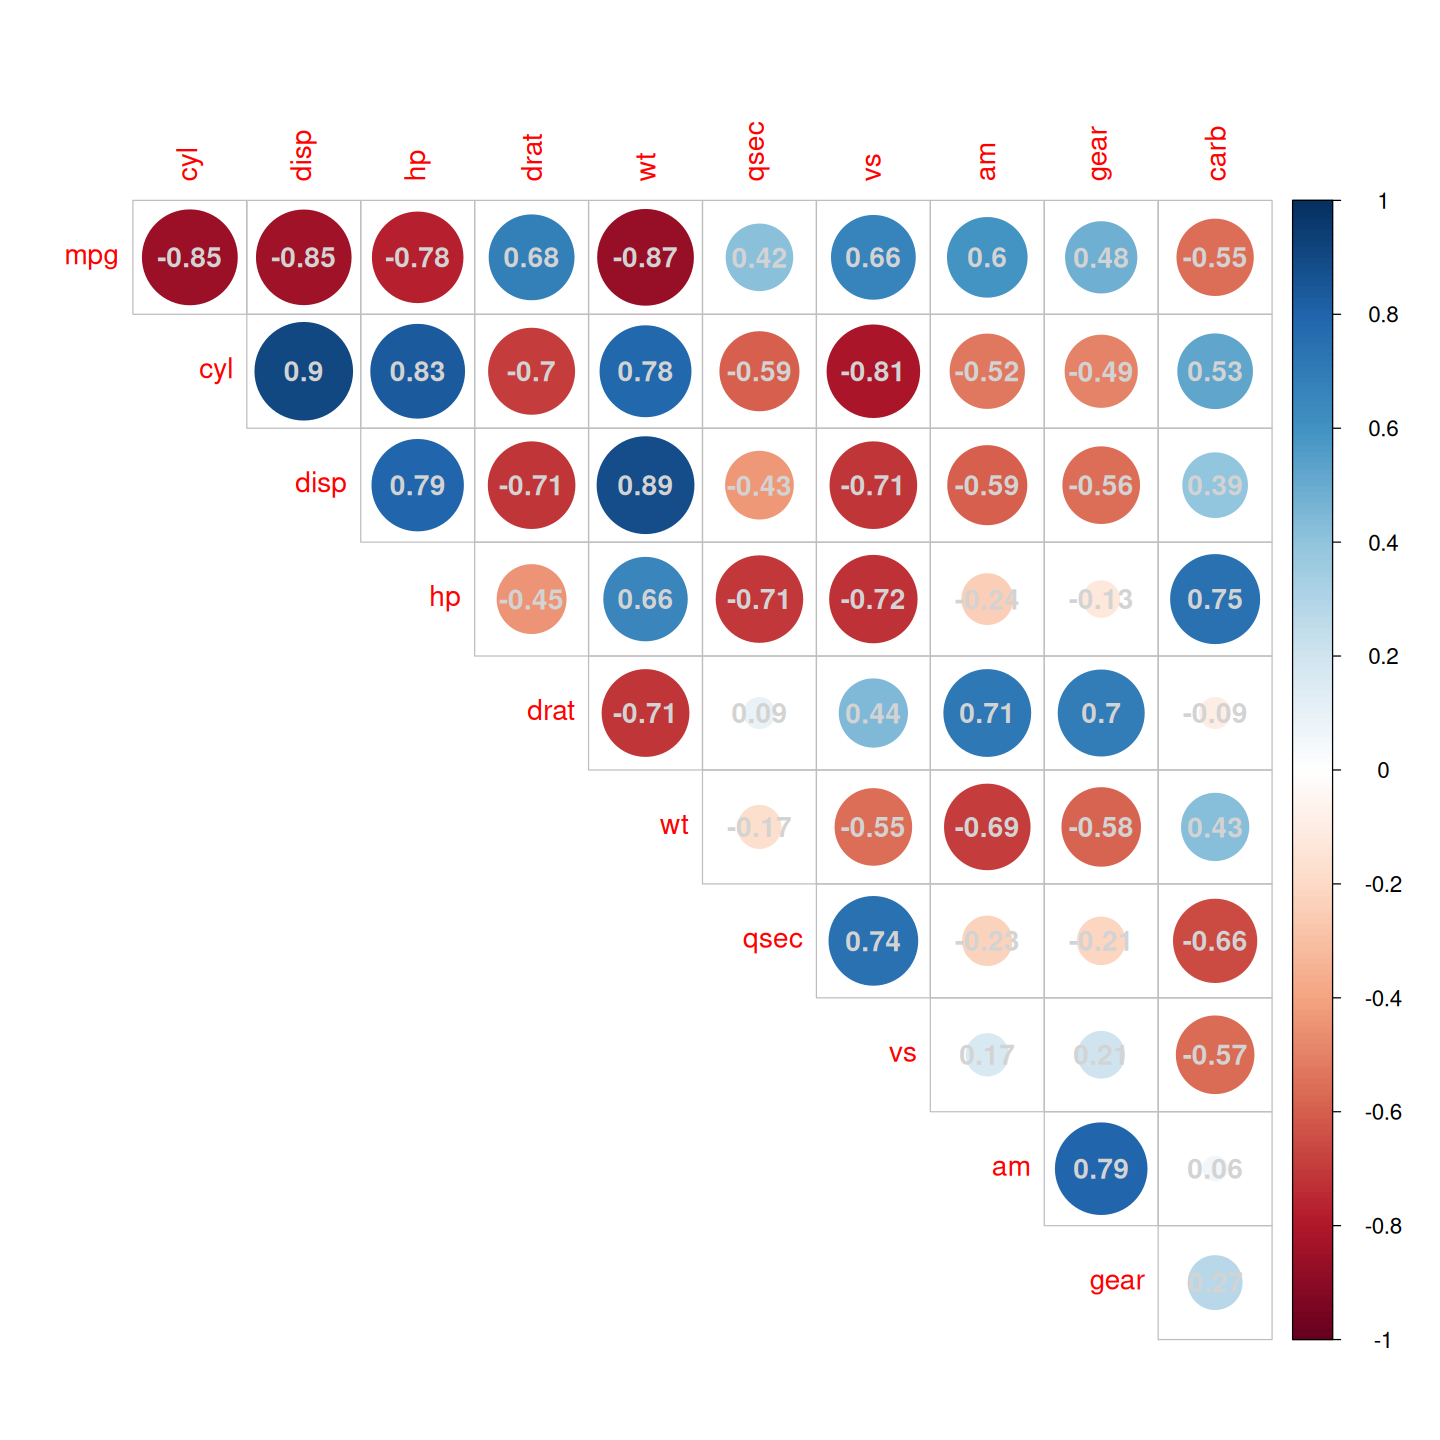

In [65]:
library('corrplot')

data(mtcars)
par(cex=1.4)
corrplot(cor(mtcars), 
        type='upper',            # just upper-diagonal
        addCoef.col='lightgrey', # add coeficient labels
        diag=FALSE)              # hide diagonal

### VIF Barplot
Once we have a model and we want to use VIF, it can be useful to visualise this as a bar chart with standard cut-offs of 5 and 10. In the example below, we include the same `wt.copy` variable as used previously.

In [66]:
options(repr.plot.width=12, repr.plot.height=7)

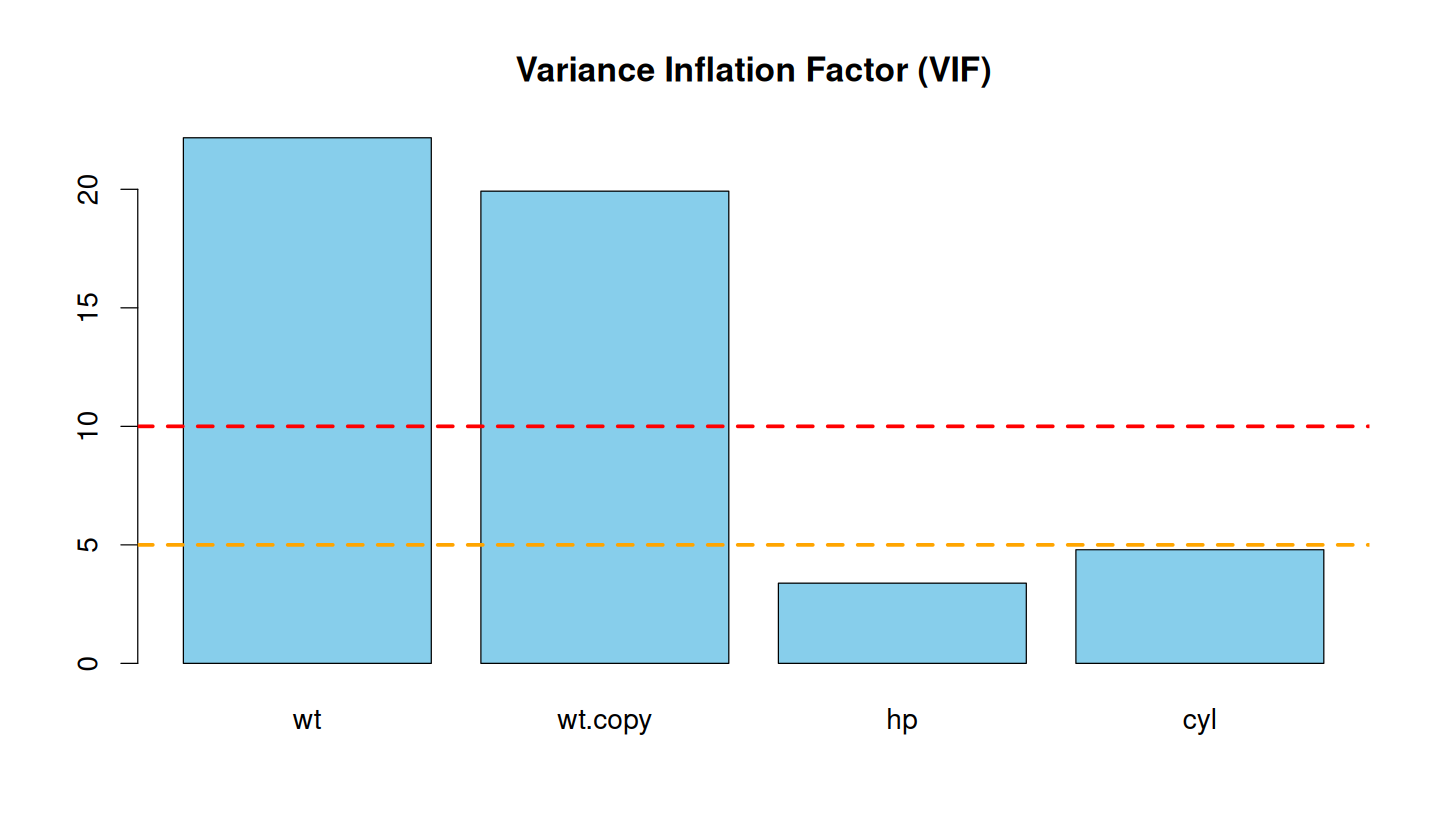

In [67]:
set.seed(666)
data(mtcars)
wt           <- mtcars$wt
wt.copy      <- wt + rnorm(n=length(wt), mean=0, sd=0.2)
mod.multicol <- lm(mpg ~ wt + wt.copy + hp + cyl, data=mtcars)
vif.values   <- vif(mod.multicol)

par(cex=1.4)
barplot(vif.values, main = "Variance Inflation Factor (VIF)", col = "skyblue")
abline(h=5,  col="orange", lty=2, lwd=3)
abline(h=10, col="red",    lty=2, lwd=3)

### Influence Plot

0.5 and 1 are common cutoffs for Cook's Distance.

In [93]:
options(repr.plot.width=12, repr.plot.height=9)

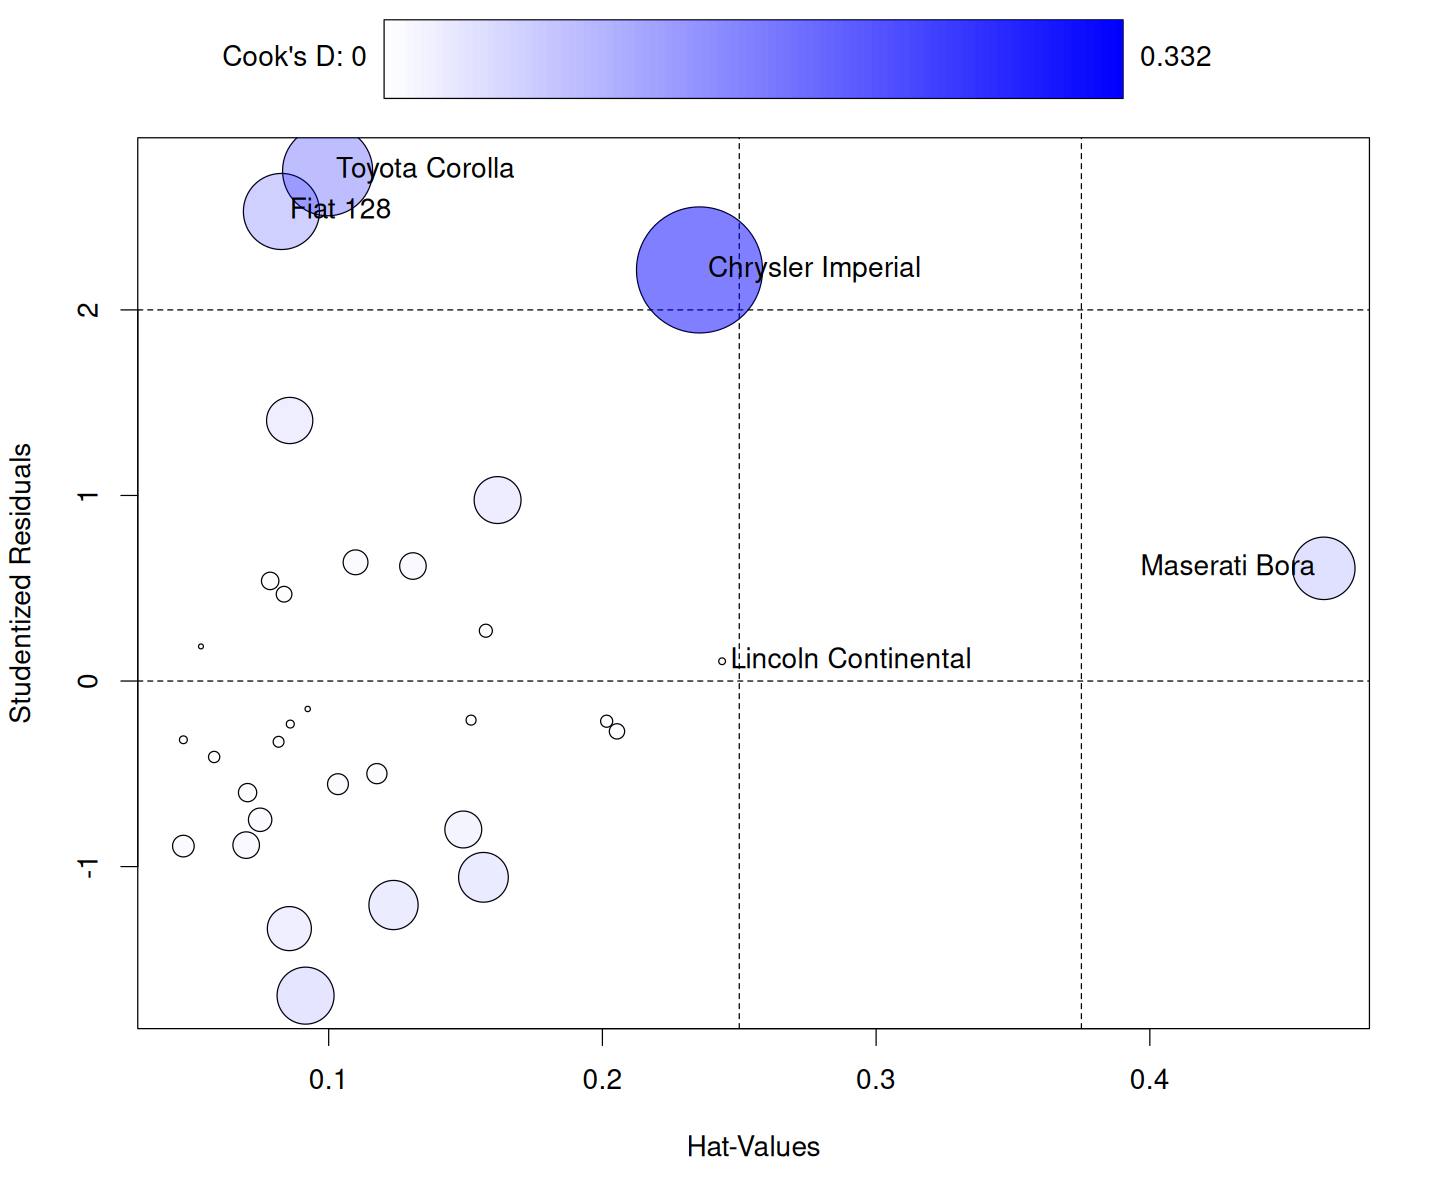

In [108]:
par(cex=1.4)
bad.points <- influencePlot(mod)

In [109]:
print(bad.points)

                      StudRes        Hat        CookD
Lincoln Continental 0.1065775 0.24373270 0.0009486833
Chrysler Imperial   2.2153833 0.23547715 0.3316313326
Fiat 128            2.5303244 0.08274176 0.1210330843
Toyota Corolla      2.7498370 0.09961207 0.1694339333
Maserati Bora       0.6073374 0.46356582 0.0815260489


### Added-variable Plots

In [105]:
options(repr.plot.width=12, repr.plot.height=10)

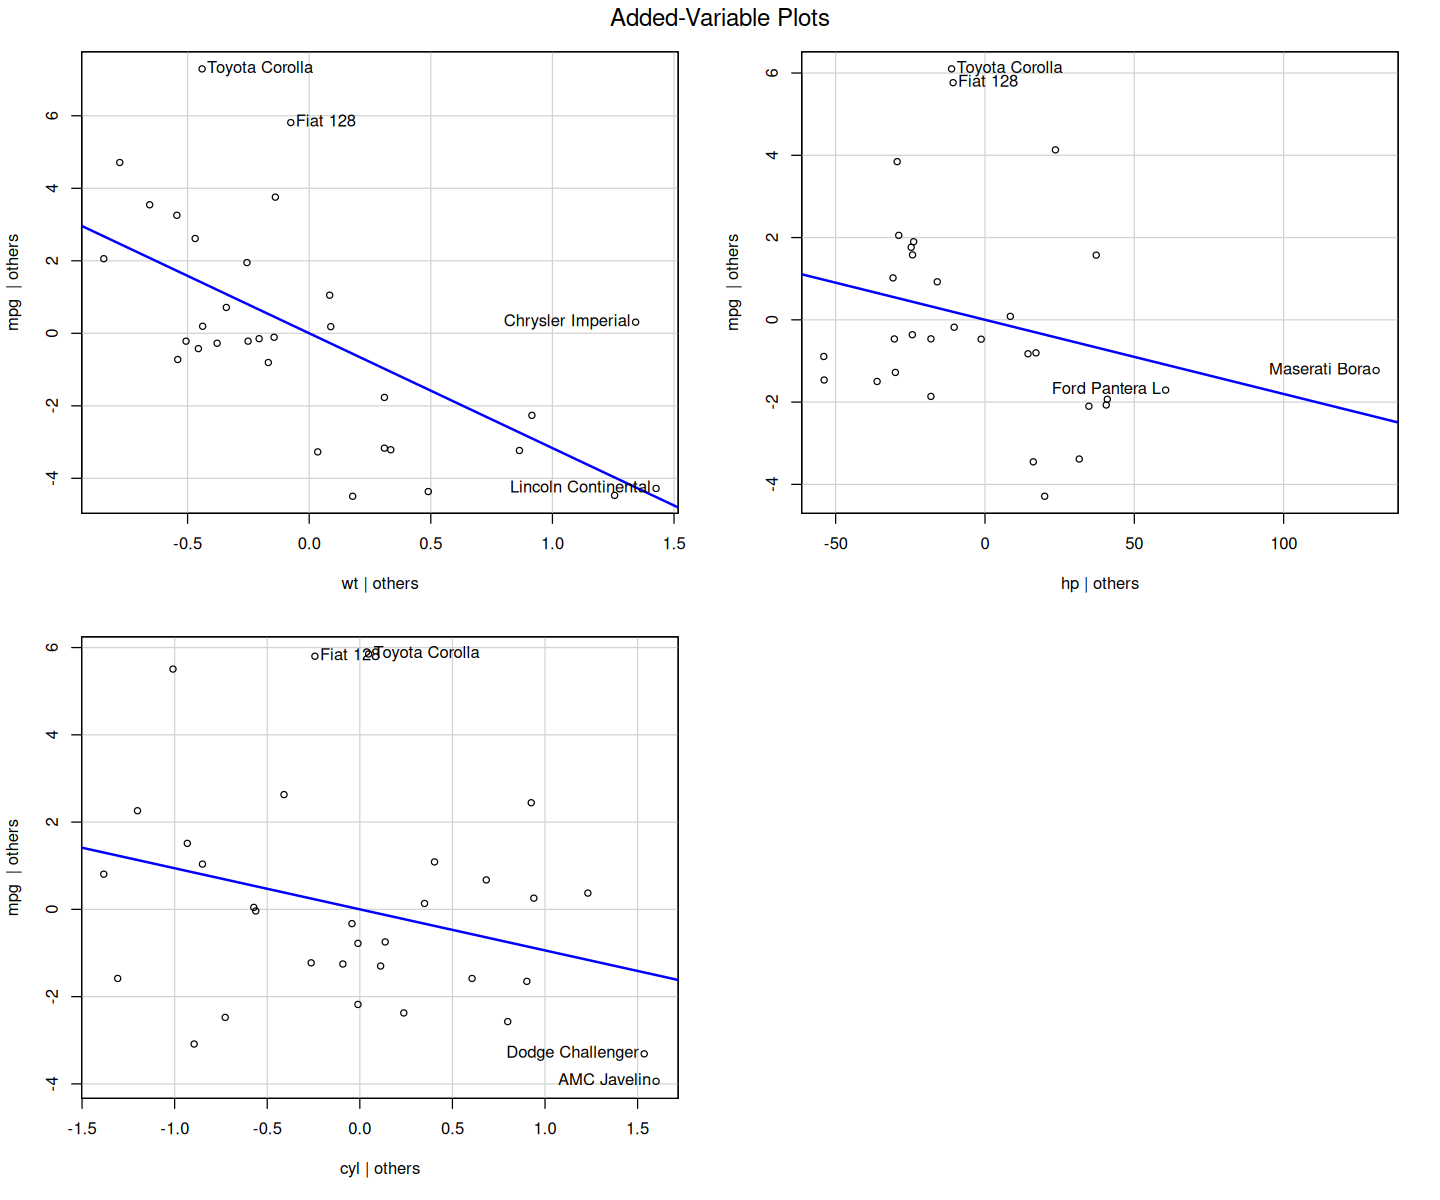

In [106]:
avPlots(mod)

### Effects Plots

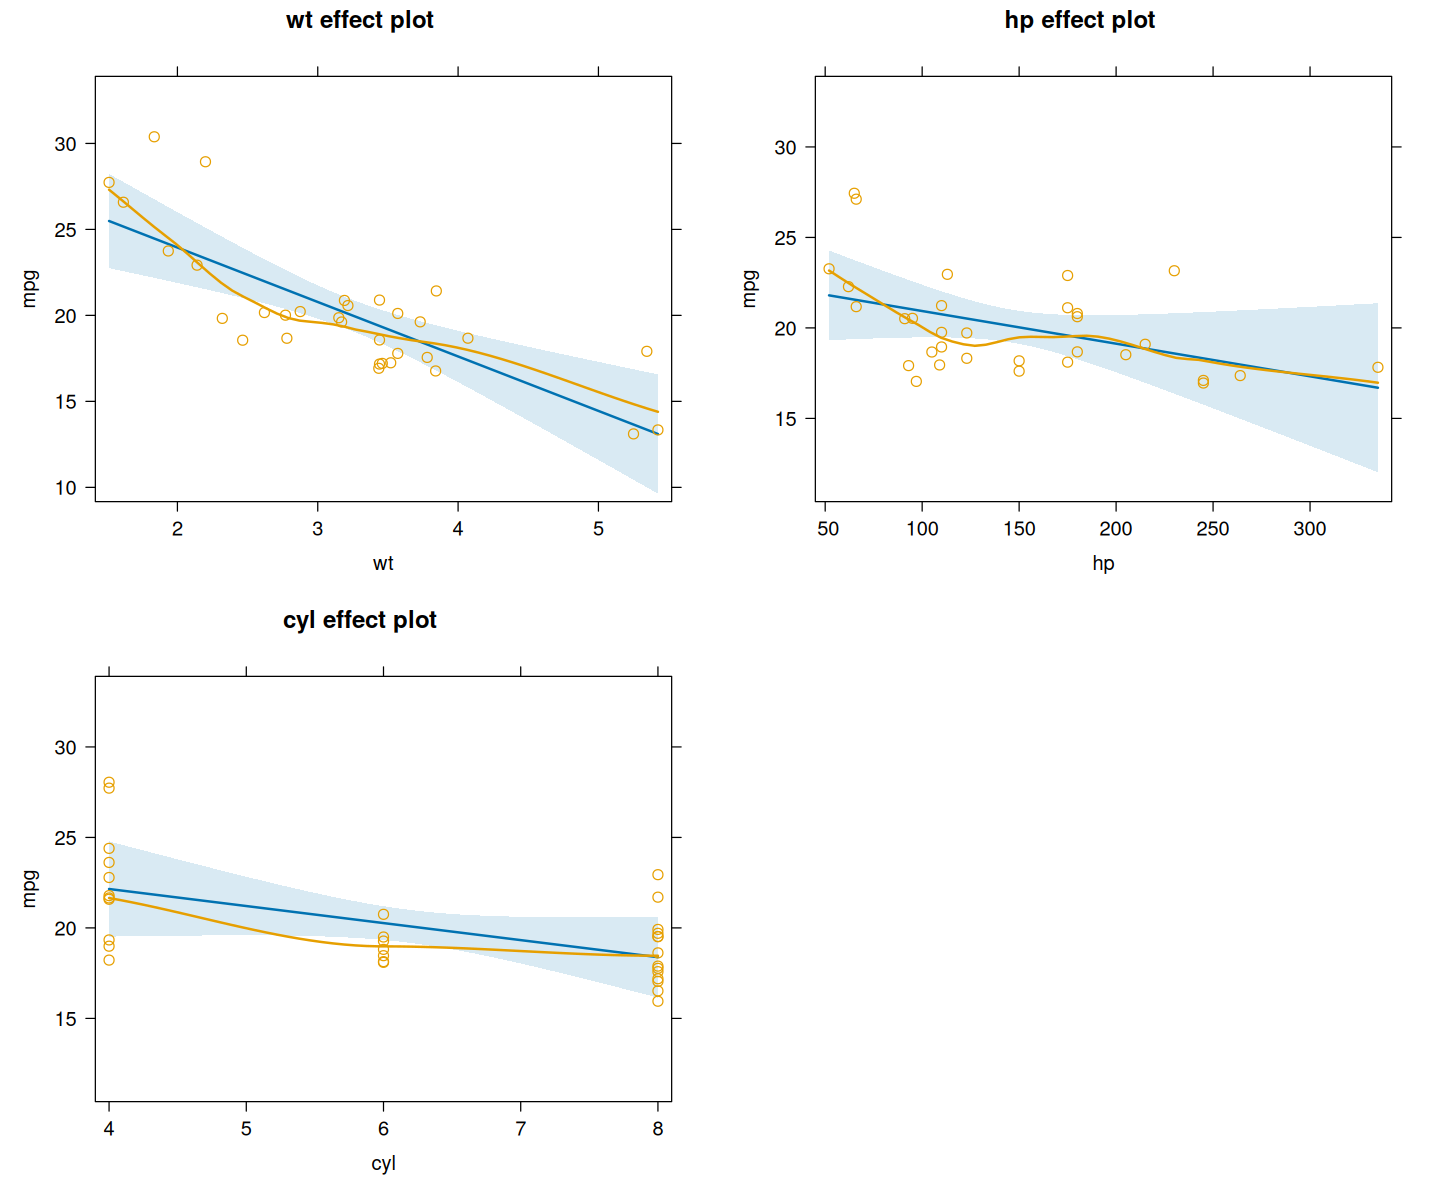

In [107]:
library(effects)
options(warn=-1)
plot(allEffects(mod, residuals=TRUE))
options(warn=0)

Effects plots will become increasingly relevant when we discuss visualising results from ANOVA and ANCOVA models, so it is worthwhile introducing them now.

[^VIF-foot]: Note that some authors suggest VIF > 10 to be the marker for concerning multicollinearity. Here, we would recommend the more cautious approach of using VIF > 5.

[^NASA-foot]: [Faraway (2005)](https://www.utstat.toronto.edu/~brunner/books/LinearModelsWithR.pdf) provides a real-world example of why this is *not* good practise. This concerns the delay in the discovery of the hole in the Ozone layer due to NASA's automatic data analysis algorithms discarding very low readings assumed to be mistakes.